In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math


In [2]:
#the start and end date
start_date = dt.datetime(2020,4,1)
end_date = dt.datetime(2023,4,1)

#loading from yahoo finance
data = yf.download("GOOGL",start_date, end_date)

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns',5)
print(data)


[*********************100%***********************]  1 of 1 completed

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2020-04-01   56.200001   56.471001  ...   54.968887  51970000
2020-04-02   55.000000   56.138500  ...   55.713547  56410000
...                ...         ...  ...         ...       ...
2023-03-30  100.910004  101.160004  ...  100.640800  33086200
2023-03-31  101.300003  103.889999  ...  103.473785  36863400

[756 rows x 6 columns]


In [3]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)


(605, 1) (151, 1)


In [4]:
# Selecting Open Price values
dataset_train = train_data.Open.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape


(605, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])


[[0.01246754]
 [0.        ]
 [0.00764156]
 [0.01714287]
 [0.0607844 ]]


In [6]:
# Selecting Open Price values
dataset_test = test_data.Open.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])


[0.98362881] [1.] [0.83867656] [0.84481572] [0.86118691]


In [7]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()


[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.1081195 , 0.12337662, 0.13402599,
       0.13574544, 0.14640004, 0.14378702, 0.16011432, 0.14345973,
       0.12130912, 0.12896625, 0.13588574, 0.14830132, 0.15021299,
       0.16155324, 0.15787013, 0.17764155, 0.16623377, 0.15584416,
       0.16645714, 0.16919484, 0.17402597, 0.178026  , 0.17495062,
       0.16396881, 0.16949613, 0.17934547, 0.18779741, 0.17715843])]
[0.16927791446834417]

[array([0.01246754, 0.        , 0.00764156, 0.01714287, 0.0607844 ,
       0.05355843, 0.06139221, 0.05272728, 0.0727117 , 0.0761091 ,
       0.08682596, 0.0943896 , 0.08825454, 0.07413508, 0.0733039 ,
       0.08609869, 0.08051948, 0.09974024, 0.09516887, 0.12727273,
       0.12018702, 0.11641037, 0.10

In [8]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])


In [9]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (555, 50, 1) y_train : (555, 1)


In [10]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_test : (101, 50, 1) y_test : (101, 1)


In [11]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [12]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6,
                                  momentum=0.9,
                                  nesterov=True),
                  loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.0154
Epoch 2/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.0044
Epoch 3/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - loss: 0.0029
Epoch 4/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 0.0031
Epoch 5/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.0028
Epoch 6/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - loss: 0.0024
Epoch 7/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - loss: 0.0022
Epoch 8/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.0022
Epoch 9/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - loss: 0.0021
Epoch 10/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - loss: 0.0020
Epoch 11/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - loss: 0.0021
Epoch 12/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - loss: 0.0016
Epoch 13/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.0017
Epoch 14/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.0015
Epoch 15/20
278/278 ━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

In [15]:
y_RNN = regressor.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step


In [16]:
y_RNN_O = scaler.inverse_transform(y_RNN)

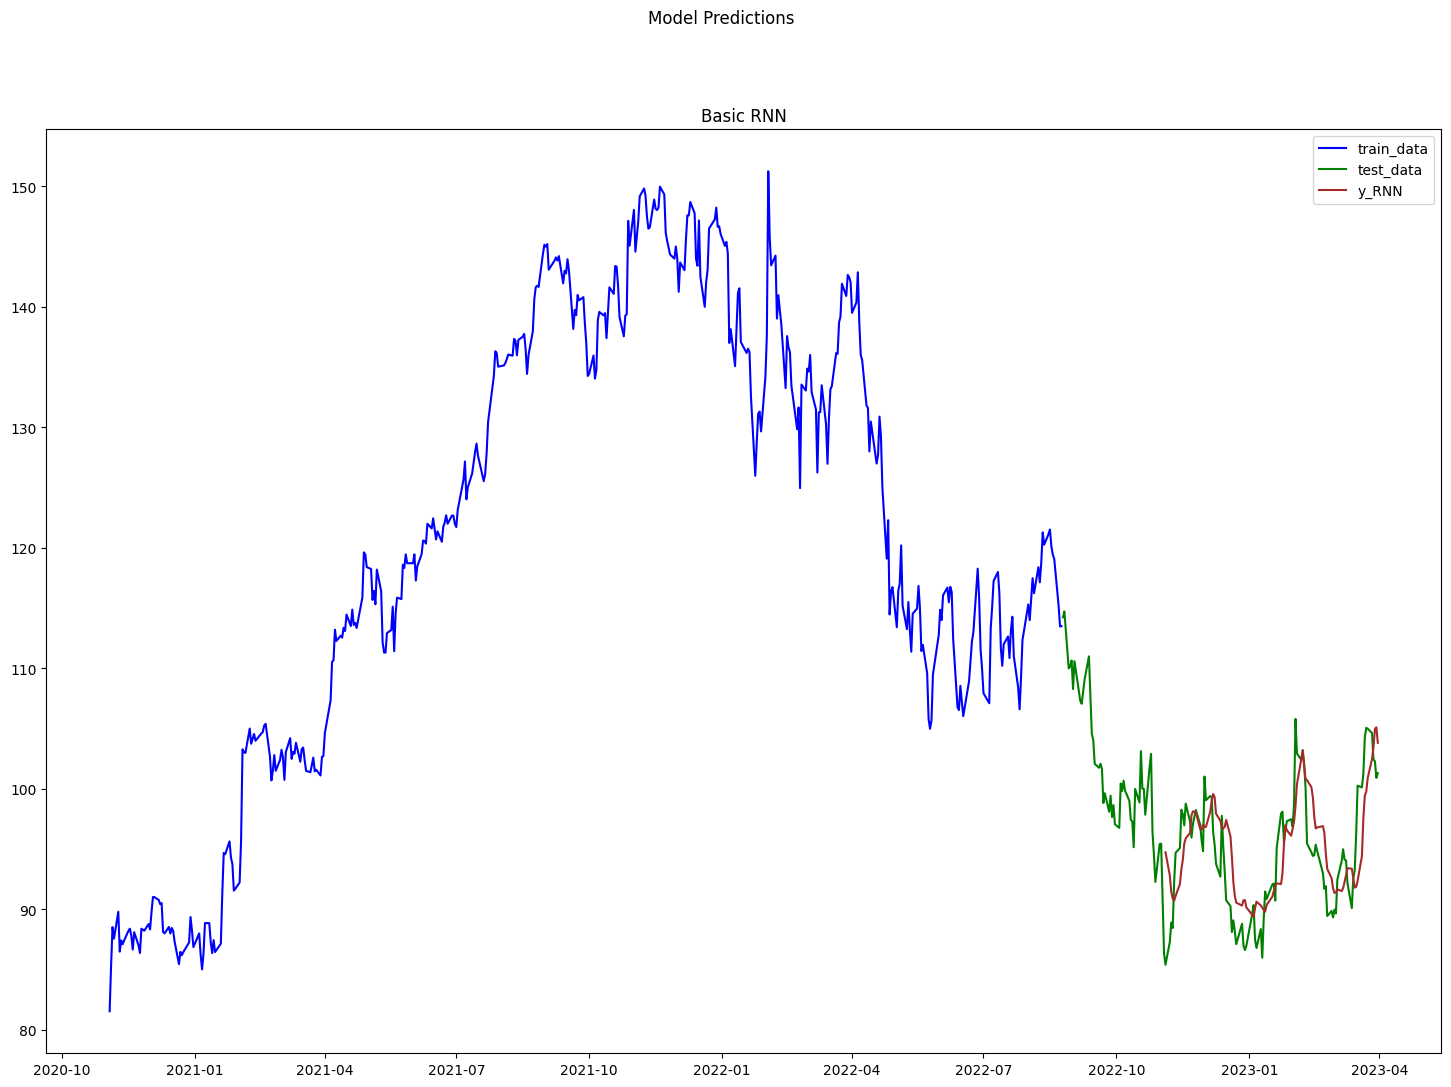

In [23]:
fig, axs = plt.subplots(figsize =(18,12),sharex=True, sharey=True) # remove 1 from arguments
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs.plot(train_data.index[150:], train_data.Open[150:], label = "train_data", color = "b") # remove [0]
axs.plot(test_data.index, test_data.Open, label = "test_data", color = "g") # remove [0]
axs.plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown") # remove [0]
axs.legend()
axs.title.set_text("Basic RNN")